## Análisis exploratorio de datos

El **análisis exploratorio de datos**, también conocido como EDA (*Exploratory Data Analysis*) es el primer paso para resolver cualquier problema de Machine Learning. Consiste en un proceso que busca analizar e investigar los conjuntos de datos de los que disponen y resumir sus principales características, empleando a menudo técnicas de visualización de datos. Este análisis se lleva a cabo a través de una serie de pasos que se detallan a continuación.

En esta sección ahondaremos en el concepto trabajando con el conjunto de datos del [Titanic](https://www.kaggle.com/competitions/titanic).

## DÍA 1

### Paso 1: Planteamiento del problema y recopilación de datos

Antes de comenzar a analizar el conjunto de datos, debemos entender, por un lado, el problema o desafío que estamos intentando resolver con esta información y lo idóneo o útil que puede resultarnos.

En este caso, queremos analizar qué personas sobrevivieron o no en el naufragio del Titanic y, en sucesivas fases, poder entrenar un modelo de Machine Learning para responder a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?". Por lo tanto, encontramos que el dataset del que disponemos puede ayudarnos a resolver la cuestión planteada y aplicamos un proceso de EDA para conocerlo más en detalle.

Importaremos el conjunto de datos para comenzar a trabajar con él:

In [2]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_test.csv")
test_survived_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/gender_submission.csv")
test_data["Survived"] = test_survived_data["Survived"]

total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Paso 2: Exploración y limpieza de datos

Una vez que hemos cargado el conjunto de datos, debemos analizarlo en su totalidad, sin distinción de train y test, para obtener conclusiones conjuntas. Una vez que tenemos la información cargada en una estructura de datos manejable como es un DataFrame de Pandas, podemos arrancar con el proceso.

Conocer las dimensiones y tipologías de datos del objeto con el que estamos trabajando es vital. Para ello necesitamos el atributo `shape` para obtener las dimensiones del objeto y la función `info()` para conocer la tipología y la cantidad de valores no nulos:

In [3]:
# Obtener las dimensiones
total_data.shape

(1309, 12)

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


Una vez hemos obtenido esta información, es importante que seamos capaces de extraer conclusiones, como las siguientes:

- Existen un total de 1309 filas (en este caso, personas) y 12 columnas, de entre las que encontramos el objetivo o clase a predecir, `Survived`.
- La variable `Cabin` solo tiene 295 instancias con valores, por lo que contendría más de 1000 valores nulos. La variable `Age` también cuenta con valores nulos, pero en un número mucho más reducido que el anterior. El resto de variables cuentan siempre con valor.
- Los datos cuentan con 7 características numéricas y 5 características categóricas.

#### Eliminar duplicados

Un punto muy importante a tener en cuenta en este paso es eliminar aquellas instancias que pudieran estar duplicadas en el conjunto de datos. Esto es crucial, ya que, de dejarlo, el mismo punto tendría varias representaciones, lo cual es matemáticamente incoherente e incorrecto. Para ello, hemos de ser inteligentes buscando duplicados y conocer previamente si los hay y dónde, antes de eliminarlos. Además, tenemos que tener en cuenta que una instancia puede estar repetida independientemente del identificador que pueda tener, así que en este caso nos interesa eliminar del análisis la variable `PassengerId`, ya que podría estar mal generada.

In [5]:
total_data.drop("PassengerId", axis = 1).duplicated().sum()

np.int64(0)

En este caso, no encontramos ningún valor duplicado. En el caso de que lo hubiésemos encontrado, el siguiente paso sería aplicar la función de `drop_duplicates()`.

In [6]:
total_data = total_data.drop_duplicates(subset = total_data.columns.difference(['PassengerId']))
print(total_data.shape)
total_data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Excluiríamos de nuevo la columna identificativa, aunque podríamos repetir el análisis incluyéndola para enriquecer el análisis:

In [28]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Eliminar información irrelevante

Cuando queremos preparar los datos para entrenar un modelo predictivo, debemos responder a la siguiente pregunta: ¿son todas las características imprescindibles para realizar una predicción? Normalmente, esa pregunta es un rotundo no. Tenemos que tratar de ser lo más objetivos posible y llevar a cabo este proceso previo antes de la fase de selección de características. Por lo tanto, aquí lo que trataremos de hacer es una eliminación controlada de aquellas variables que podemos estar seguros de que el algoritmo no va a utilizar en el proceso predictivo, estas son `PassengerId`, `Name`, `Ticket` y `Cabin`.

In [7]:
total_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)
total_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Paso 3: Análisis de variables univariante

Una **variable univariante** es un término estadístico que se emplea para referenciar un conjunto de observaciones de un atributo. Esto es, el análisis columna a columna del DataFrame. Para ello, debemos distinguir si una variable es categórica o numérica, ya que el cuerpo del análisis y las conclusiones que se pueden obtener serán distintas.

#### Análisis sobre variables categóricas

Una **variable categórica** es un tipo de variable que puede tomar uno de un número limitado de categorías o grupos. Estos grupos son a menudo nominales (por ejemplo, el color de un coche: rojo, azul, negro, etc, pero ninguno de estos colores es inherentemente "mayor" o "mejor" que los demás) pero pueden también representarse mediante números finitos.

Para representar este tipo de variables utilizaremos histogramas. Antes de comenzar a graficar, debemos identificar cuáles son categóricas, y se puede comprobar fácilmente analizando el rango de valores. En este caso, las variables categóricas son `Survived`, `Sex`, `Pclass`, `Embarked`, `SibSp` y `Parch`:

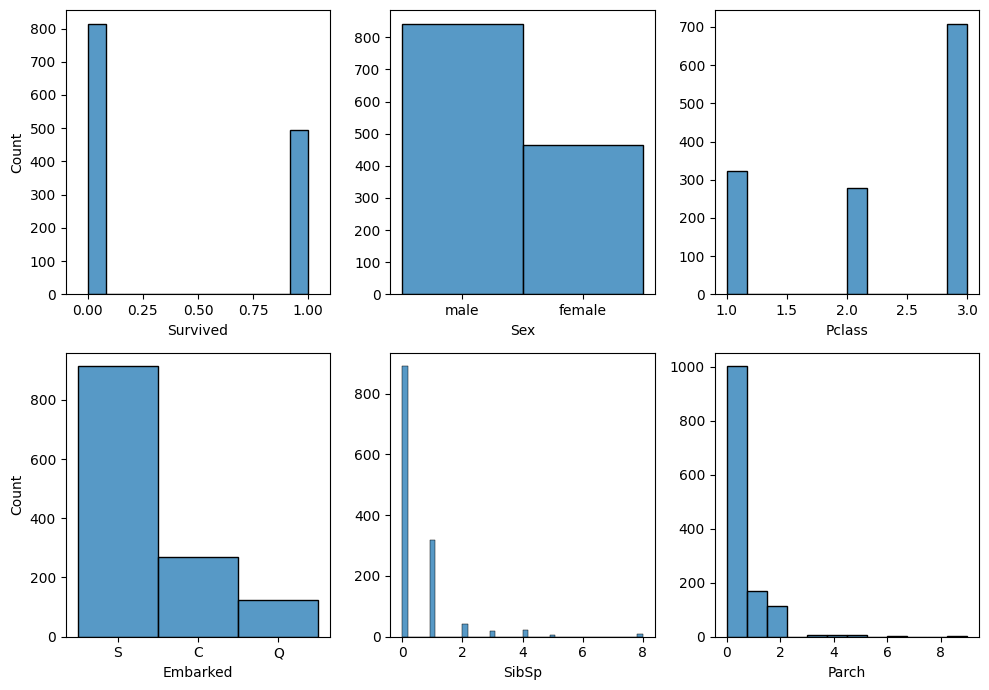

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = total_data, x = "Survived").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = total_data, x = "Sex").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = total_data, x = "Pclass").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data, x = "Embarked")
sns.histplot(ax = axis[1, 1], data = total_data, x = "SibSp").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = total_data, x = "Parch").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Un histograma es una representación gráfica de la distribución de un conjunto de datos. Se utiliza además para comprender la frecuencia de los datos. Al observar un histograma, podemos entender si los datos están sesgados hacia un extremo, si son simétricos, si tienen muchos valores atípicos, etcétera. Con la representación de cada variable podemos determinar que:

- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a los que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

#### Análisis sobre variables numéricas

Una **variable numérica** es un tipo de variable que puede tomar valores numéricos (enteros, fracciones, decimales, negativos, etc.) en un rango infinito. Una variable categórica numérica puede ser también una variable numérica (por ejemplo, para los sucesivos análisis, podemos tomar la clase `Survived` como numérica también para estudiar relaciones). Normalmente se representan utilizando un histograma y diagramas de caja, expuestos juntos. Antes de comenzar a graficar, debemos también identificar cuáles son las numéricas, que son `Fare`, `Age` y `PassengerId`. Sin embargo, esta última carece de sentido, así que graficaremos las dos primeras:

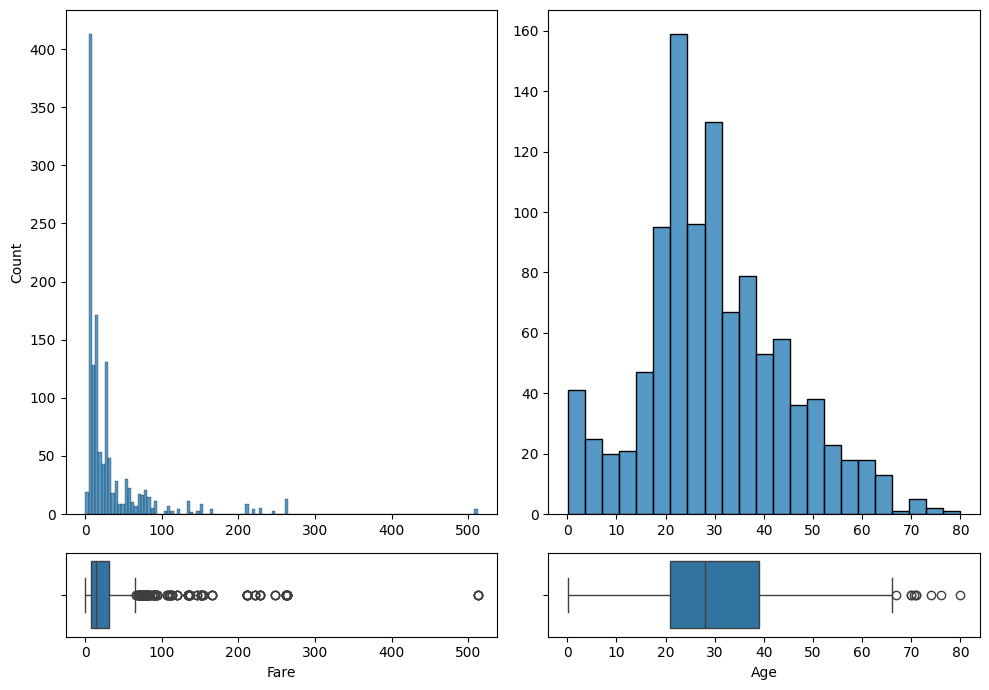

In [9]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "Fare").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Fare")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Age")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

La combinación de los dos gráficos anteriores nos permite conocer la distribución y sus características estadísticas. De la visualización resultante podemos ver que ambas variables tienen valores atípicos que están lejos de la distribución estándar y que sus distribuciones son ligeramente asimétricas pero cercanas a una distribución normal; la primera totalmente sesgada hacia la izquierda, donde la media es inferior a la moda y la otra con menor tendencia.

### Paso 4: Análisis de variables multivariante

Tras analizar las características una a una, es momento de analizarlas en relación con la predictora y con ellas mismas, para sacar conclusiones más claras acerca de sus relaciones y poder tomar decisiones sobre su procesamiento.

Así, si quisiéramos eliminar una variable debido a una alta cantidad de valores nulos o ciertos outliers, es necesario antes aplicar este proceso para asegurar que la eliminación de ciertos valores no son críticos para la supervivencia de un pasajero. Por ejemplo, la variable `Cabin` tiene muchos valores nulos, y tendríamos que asegurar que no hay relación entre ella y la supervivencia antes de eliminarla, ya que quizá pudiera ser muy significativa e importante para el modelo y su presencia podría decantar la predicción.

#### Análisis numérico-numérico

Cuando las dos variables que se comparan tienen datos numéricos, se dice que el análisis es numérico-numérico. Para comparar dos columnas numéricas se utilizan diagramas de dispersión y análisis de correlaciones.

##### Survived - (Fare, Age)

Utilizaremos la variable `Survived` para comenzar con el análisis bivariante porque al tratarse de una variable categórica, pero codificada en números, puede considerarse como numérica también. Primero analizamos la clase frente a las características numéricas:

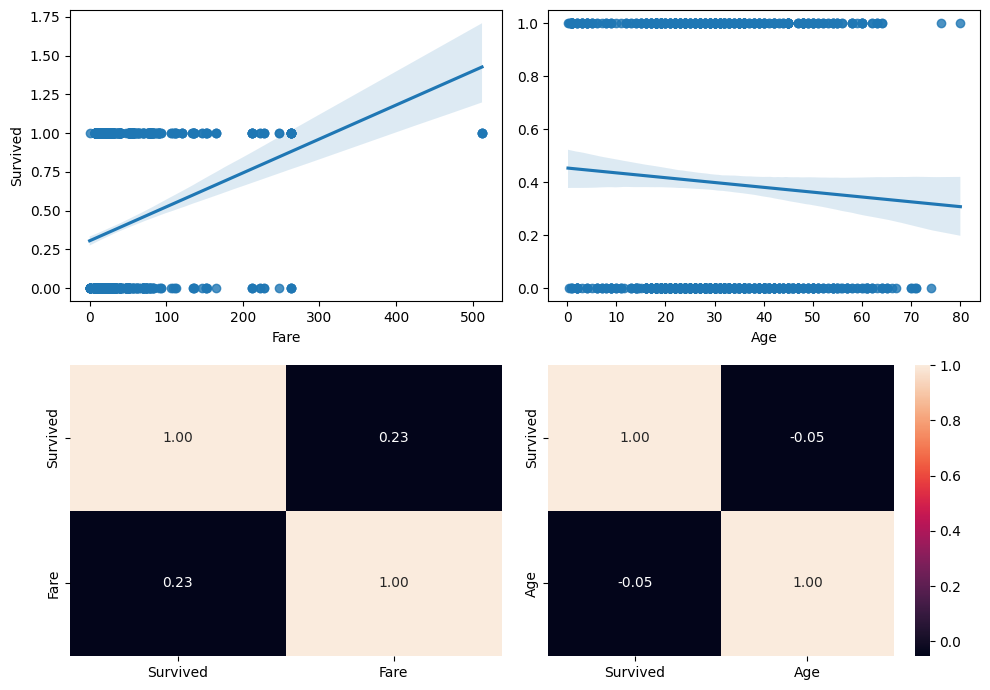

In [10]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "Fare", y = "Survived")
sns.heatmap(total_data[["Survived", "Fare"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Age", y = "Survived").set(ylabel=None)
sns.heatmap(total_data[["Survived", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Existe una relación directa (aunque no muy fuerte) entre el precio del billete (`Fare`) y la supervivencia del pasajero. Así, algunos pasajeros con un importe bajo de billete tuvieron menos probabilidad de supervivencia frente a los que adquirieron un billete con un precio mayor. También existe una relación lineal negativa, más débil que la anterior, entre la edad (`Age`) y la variable objetivo. Esto tiene sentido considerando que los niños eran uno de los grupos que tenían preferencia en usar los botes para sobrevivir.

En resumen, a pesar de existir cierta relación con estas características frente a la predictora, la significancia no es muy elevada, no siendo factores decisivos sobre si un pasajero sobrevivía o no.

##### Fare - Age

A continuación también podemos relacionar ambas variables para determinar su grado de afinidad o correlación:

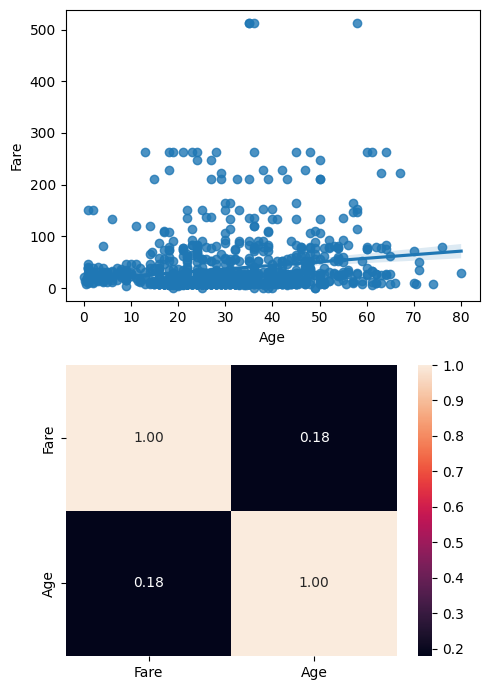

In [11]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = total_data, x = "Age", y = "Fare")
sns.heatmap(total_data[["Fare", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Se puede determinar que no existe una relación muy fuerte entre ambas variables y que la edad no impacta sobre que el precio del billete sea mayor o no.

#### Análisis categórico-categórico

Cuando las dos variables que se comparan tienen datos categóricos, se dice que el análisis es categórico-categórico. Para comparar dos columnas categóricas se utilizan histogramas y combinaciones.

##### Survived - (Sex, Pclass, Embarked, SibSp, Parch)

Primero analizamos la clase frente a las características categóricas, una a una. Aquí no habrá combinaciones de varias predictoras y la clase:

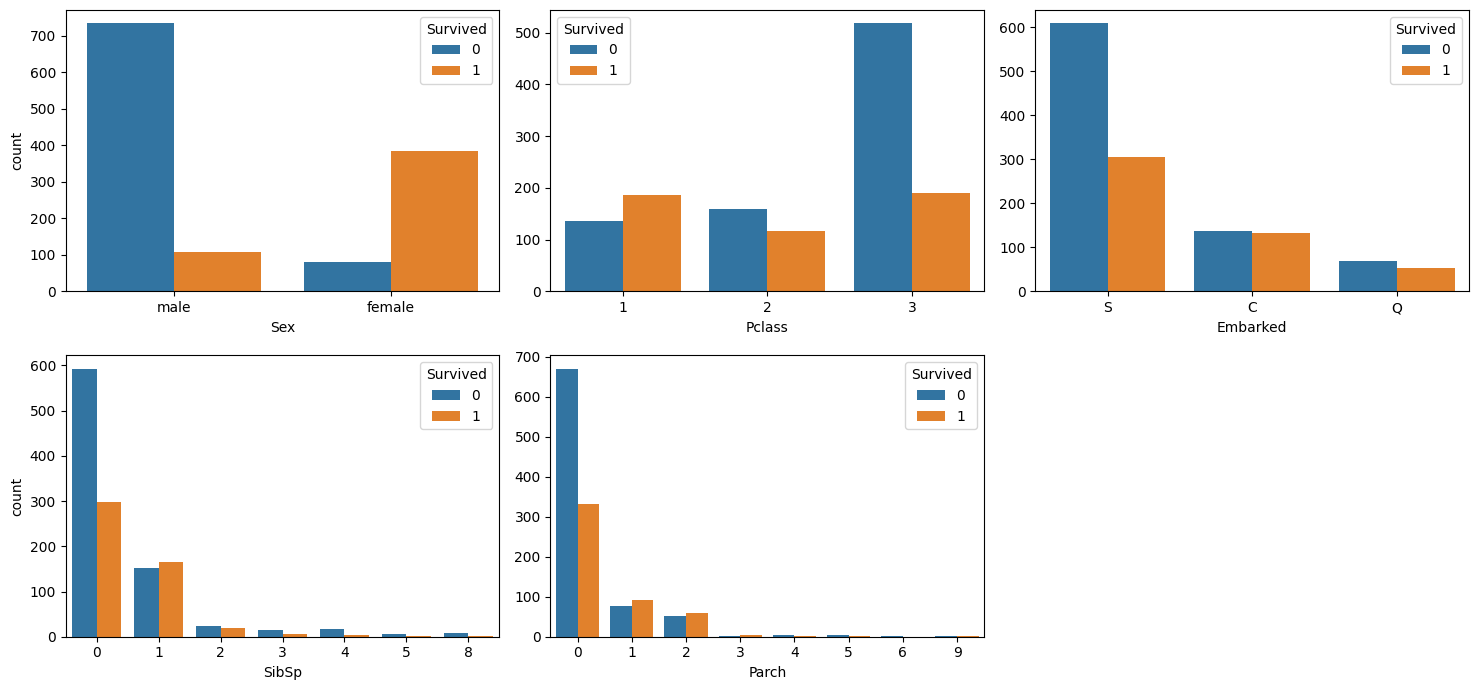

In [12]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = total_data, x = "Sex", hue = "Survived")
sns.countplot(ax = axis[0, 1], data = total_data, x = "Pclass", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = total_data, x = "Embarked", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_data, x = "SibSp", hue = "Survived")
sns.countplot(ax = axis[1, 1], data = total_data, x = "Parch", hue = "Survived").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

Del gráfico anterior podemos obtener las siguientes conclusiones:

- Con mayor proporción sobrevivieron las mujeres frente a los hombres. Esto es así porque en los planes de evacuación tenían prioridad las mujeres frente a los hombres.
- Las personas que viajaron solas tuvieron más problemas para sobrevivir frente a las que viajaron acompañadas.
- Aquellos que viajaron en una mejor clase en el Titanic tuvieron una mayor probabilidad de supervivencia.

##### Combinaciones de la clase con varias predictoras

El análisis multivariante también permite combinar la clase con varias predictoras al mismo tiempo para enriquecer el análisis. Este tipo de operaciones deben ser subjetivas y deben combinar características relacionadas entre sí. Por ejemplo, no tendría sentido hacer un análisis entre la clase, el sexo del pasajero y la estación en la que accedió al Titanic, ya que no guarda relación el sexo del pasajero con la estación. Sin embargo, la clase y el sexo del pasajero frente a su supervivencia podría ser un análisis digno de estudio, entre otras casuísticas que se presentan a continuación:

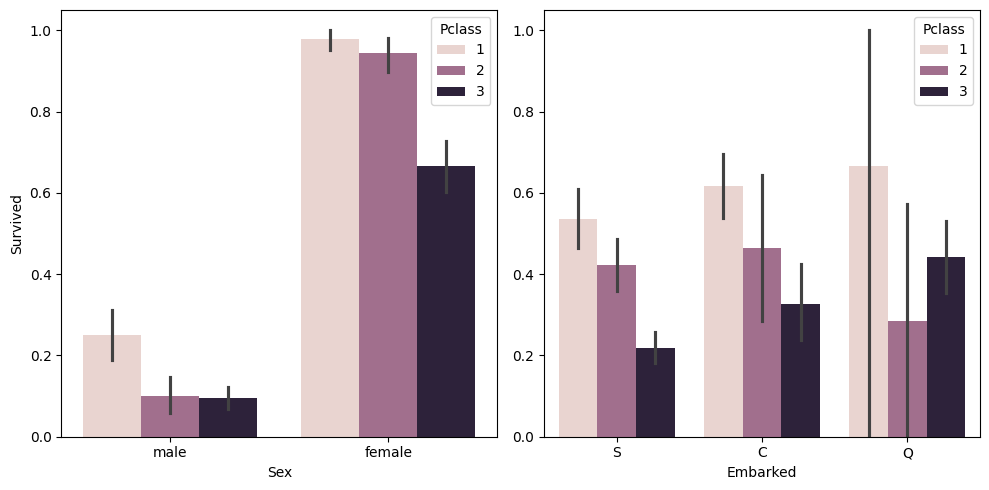

In [13]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = total_data, x = "Sex", y = "Survived", hue = "Pclass")
sns.barplot(ax = axis[1], data = total_data, x = "Embarked", y = "Survived", hue = "Pclass").set(ylabel = None)

plt.tight_layout()

plt.show()

De esos análisis se observa claramente que, independientemente del puerto de embarque, las mujeres tuvieron más posibilidades de supervivencia independientemente de la clase en la que viajaron, lo que refuerza el conocimiento obtenido anteriormente. Además, de media, las personas que viajaron en clases más altas sobrevivieron más que aquellos que no lo hicieron.

##### Análisis de correlaciones

El análisis de correlaciones con datos categóricos-categóricos busca descubrir patrones y dependencias entre variables. Para este tipo de datos no se utilizan correlaciones de Pearson (que requieren medias y varianzas), sino **tablas de contingencia**, que muestran cómo se distribuyen las categorías entre sí.  

Además, podemos aplicar el **test Chi-cuadrado** para evaluar si existe una relación estadísticamente significativa entre las variables.

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Sexo vs Supervivencia
tabla_sex = pd.crosstab(total_data["Sex"], total_data["Survived"])
print("Sexo vs Supervivencia")
print(tabla_sex, "\n")

chi2, p, dof, expected = chi2_contingency(tabla_sex)
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}\n")

# Interpretación
if p < 0.05:
    print("Existe una relación significativa entre sexo y supervivencia.")
    print("La tabla muestra que proporcionalmente sobrevivieron muchas más mujeres que hombres.\n")
else:
    print("No se observa una relación estadísticamente significativa.\n")


# Clase vs Supervivencia
tabla_class = pd.crosstab(total_data["Pclass"], total_data["Survived"])
print("Clase vs Supervivencia")
print(tabla_class, "\n")

chi2, p, dof, expected = chi2_contingency(tabla_class)
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}\n")

if p < 0.05:
    print("La clase del pasajero está asociada con la probabilidad de sobrevivir.")
    print("Los pasajeros de primera clase tuvieron muchas más posibilidades de sobrevivir que los de tercera.\n")
else:
    print("No se observa una relación estadísticamente significativa.\n")


# Puerto de embarque vs Supervivencia
tabla_embarked = pd.crosstab(total_data["Embarked"], total_data["Survived"])
print("Puerto de embarque vs Supervivencia")
print(tabla_embarked, "\n")

chi2, p, dof, expected = chi2_contingency(tabla_embarked)
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}\n")

if p < 0.05:
    print("El puerto de embarque tiene cierta relación con la supervivencia.")
    print("Algunos puertos muestran mayor proporción de supervivientes que otros.\n")
else:
    print("No se observa una relación estadísticamente significativa.\n")


Sexo vs Supervivencia
Survived    0    1
Sex               
female     81  385
male      734  109 

Chi2 = 617.31, p-value = 0.0000

Existe una relación significativa entre sexo y supervivencia.
La tabla muestra que proporcionalmente sobrevivieron muchas más mujeres que hombres.

Clase vs Supervivencia
Survived    0    1
Pclass            
1         137  186
2         160  117
3         518  191 

Chi2 = 91.72, p-value = 0.0000

La clase del pasajero está asociada con la probabilidad de sobrevivir.
Los pasajeros de primera clase tuvieron muchas más posibilidades de sobrevivir que los de tercera.

Puerto de embarque vs Supervivencia
Survived    0    1
Embarked          
C         137  133
Q          69   54
S         609  305 

Chi2 = 24.68, p-value = 0.0000

El puerto de embarque tiene cierta relación con la supervivencia.
Algunos puertos muestran mayor proporción de supervivientes que otros.



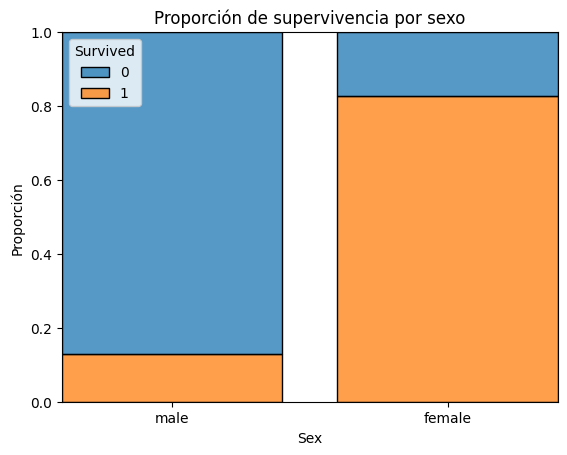

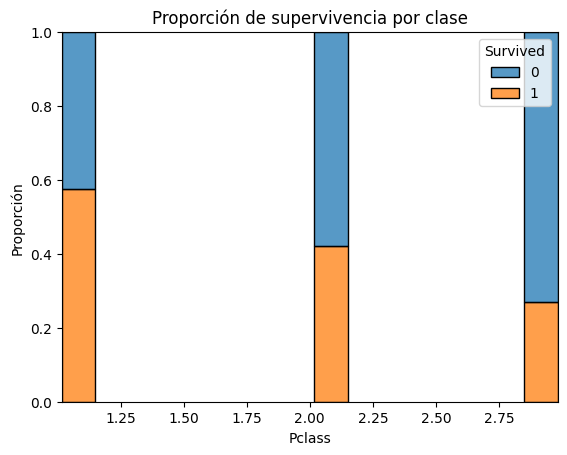

In [15]:
# Visualización: proporción de supervivencia por sexo
sns.histplot(data=total_data, x="Sex", hue="Survived", multiple="fill", shrink=0.8)
plt.title("Proporción de supervivencia por sexo")
plt.ylabel("Proporción")
plt.show()

# Visualización: proporción de supervivencia por clase
sns.histplot(data=total_data, x="Pclass", hue="Survived", multiple="fill", shrink=0.8)
plt.title("Proporción de supervivencia por clase")
plt.ylabel("Proporción")
plt.show()

El análisis de las tablas de contingencia y el test Chi-cuadrado muestran una fuerte asociación entre el sexo (`Sex`) del pasajero y su supervivencia, como ya habíamos observado en los gráficos anteriores. También se aprecia que la clase (`Pclass`) está estrechamente ligada con la probabilidad de sobrevivir.  

En el caso del número de acompañantes (`SibSp` y `Parch`), la asociación existe pero es más débil, y su impacto no parece tan decisivo como el sexo o la clase.  Finalmente, para cerrar el estudio multivariante, queda analizar la relación entre las variables categóricas y las numéricas.


#### Análisis numérico-categórico (completo)

En esta sección combinamos dos estrategias:
1) **Correlación únicamente entre variables numéricas** (Pearson), para ver relaciones lineales entre continuas.
2) **Relación numérico–categórico** mediante tasas/boxplots, sin usar Pearson con dummies.

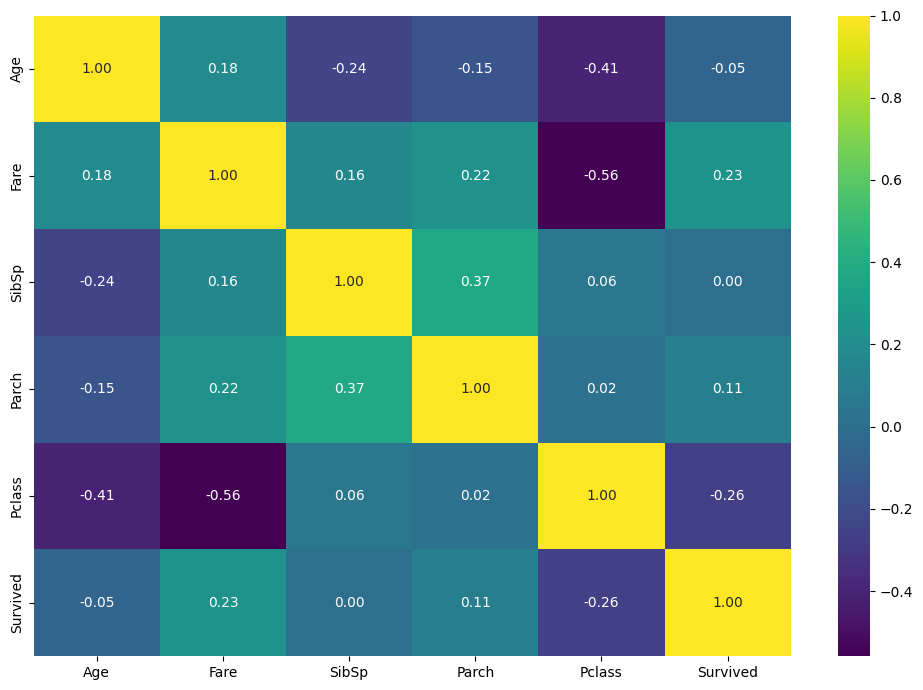

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_num = ["Age", "Fare", "SibSp", "Parch", "Pclass", "Survived"]  # todas numéricas
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(total_data[cols_num].corr(method="pearson"), annot=True, fmt=".2f", cmap="viridis", ax=ax)
plt.tight_layout()
plt.show()


,survival_rate
Sex,
female,0.82618
male,0.12930


,survival_rate
Pclass,
1,0.575851
2,0.422383
3,0.269394


,survival_rate
Embarked,
C,0.492593
Q,0.439024
S,0.333698


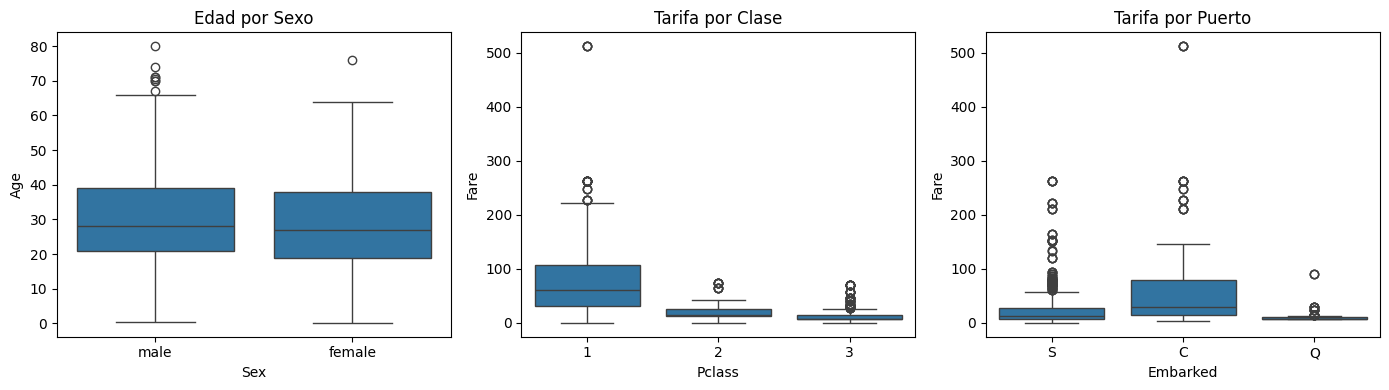

In [17]:
# Tasa de supervivencia por categoría
display(total_data.groupby("Sex")["Survived"].mean().rename("survival_rate").to_frame())
display(total_data.groupby("Pclass")["Survived"].mean().rename("survival_rate").to_frame())
display(total_data.groupby("Embarked")["Survived"].mean().rename("survival_rate").to_frame())

# Boxplots de numéricas por categoría
fig, axes = plt.subplots(1, 3, figsize=(14,4))
sns.boxplot(data=total_data, x="Sex", y="Age", ax=axes[0])
sns.boxplot(data=total_data, x="Pclass", y="Fare", ax=axes[1])
sns.boxplot(data=total_data, x="Embarked", y="Fare", ax=axes[2])
axes[0].set_title("Edad por Sexo"); axes[1].set_title("Tarifa por Clase"); axes[2].set_title("Tarifa por Puerto")
plt.tight_layout(); plt.show()


Existe una relación entre la tipología de clase (`Pclass`) y la edad del pasajero (`Age`) fuertemente negativa (los que viajaban en primera clase eran personas con alta edad) y entre la clase y la tarifa pagada (`Fare`), algo que tiene mucho sentido. El resto de correlaciones se mantienen con respecto a lo visto anteriormente.

Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:

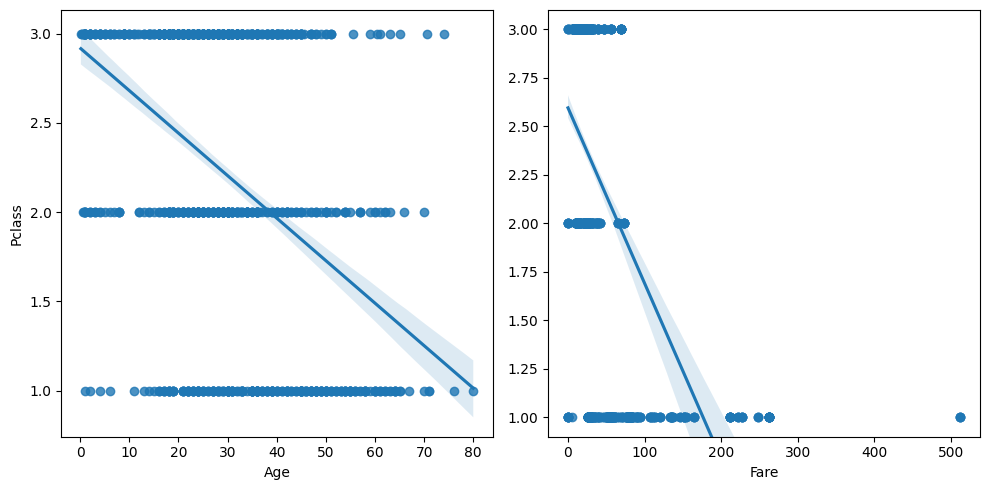

In [18]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = total_data, x = "Age", y = "Pclass")
sns.regplot(ax = axis[1], data = total_data, x = "Fare", y = "Pclass").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

En el primer gráfico vemos que cuando la edad avanza, la presencia de billetes de primera clase se hace más notoria, y conforme la edad decrece, los billetes de tercera clase se hacen más presentes, reforzando la relación negativa entre las variables observadas. El segundo gráfico también refuerza lo observado, ya que los billetes de mejor clase deben ser más caros.

Una vez calculada la correlación podemos dibujar el `pairplot` (es un paso opcional):

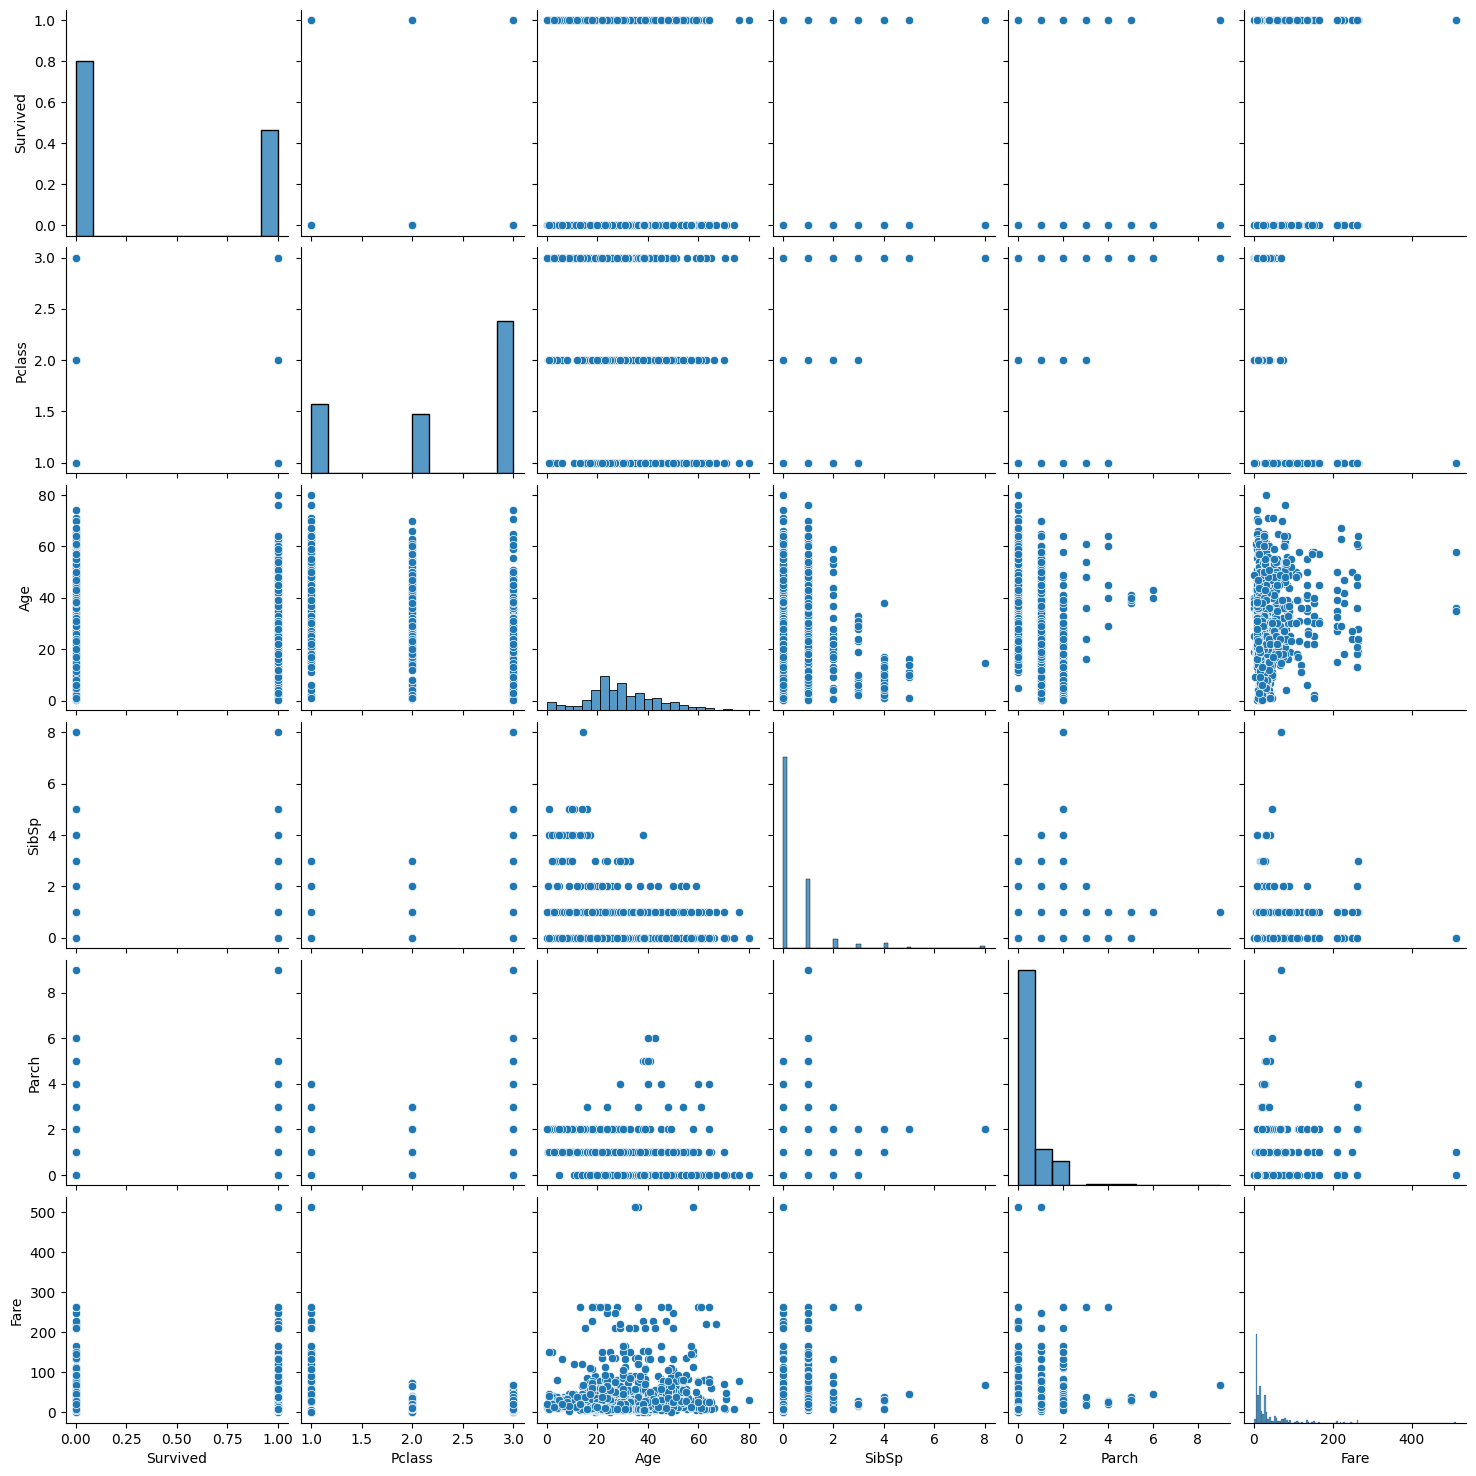

In [19]:
sns.pairplot(data = total_data)

## FIN DEL DÍA 1

¡Ahora, trabajemos y practiquemos la lección de hoy para afianzar lo aprendido!

## DÍA 2

### Paso 5: Ingeniería de características

La **ingeniería de características** (*feature engineering*) es un proceso que implica la creación de nuevas características (o variables) a partir de las existentes para mejorar el rendimiento del modelo. Esto puede implicar una variedad de técnicas como la normalización, la transformación de los datos, etcétera. El objetivo es mejorar la precisión del modelo y/o reducir la complejidad del mismo, facilitando así su interpretación.

En los pasos previos hemos empezado a trabajar con los datos eliminando duplicados, contabilizando los valores nulos e, incluso, para calcular correlaciones, transformando `Sex` y `Embarked` en categorías numéricas. Si bien esto podríamos haberlo hecho en este paso, ya que forma parte de la ingeniería de características, normalmente suele hacerse antes de analizar las variables, separando este proceso en uno previo y este que vamos a ver a continuación.

#### Análisis de outliers

Un **valor atípico** (*outlier*) es un punto de datos que se desvía significativamente de los demás. Es un valor que es notablemente diferente de lo que sería de esperar dada la tendencia general de los datos. Estos outliers pueden ser causados por errores en la recolección de datos, variaciones naturales en los datos, o pueden ser indicativos de algo significativo, como una anomalía o evento extraordinario.

El **análisis descriptivo** es una poderosa herramienta para caracterizar el conjunto de datos: la media, desviación y los cuartiles nos brindan una poderosa información sobre cada variable. La función `describe()` de un DataFrame nos ayuda a calcular en unos tiempos muy reducidos todos estos valores.

In [20]:
total_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Si bien la experiencia es un componente importante en el análisis de los resultados de la tabla anterior, podemos utilizar ciertas reglas para detectarlos, como ver el valor mínimo y máximo de una característica específica y compararlo con su percentil 25% y 75%. Por ejemplo, todo parece normal salvo para la columna `Fare` que tiene una media de 32,20 pero su percentil del 50% es 14 y su valor máximo es 512. Podríamos decir que 512 parece ser un valor atípico, pero podría ser un error de transcripción. También es posible que el billete más caro tuviera ese precio. Sería útil investigar un poco y confirmar o desmentir esa información.

Dibujar los diagramas de cajas de las variables también nos da una información muy poderosa sobre los valores atípicos que se salen de las regiones de confianza:

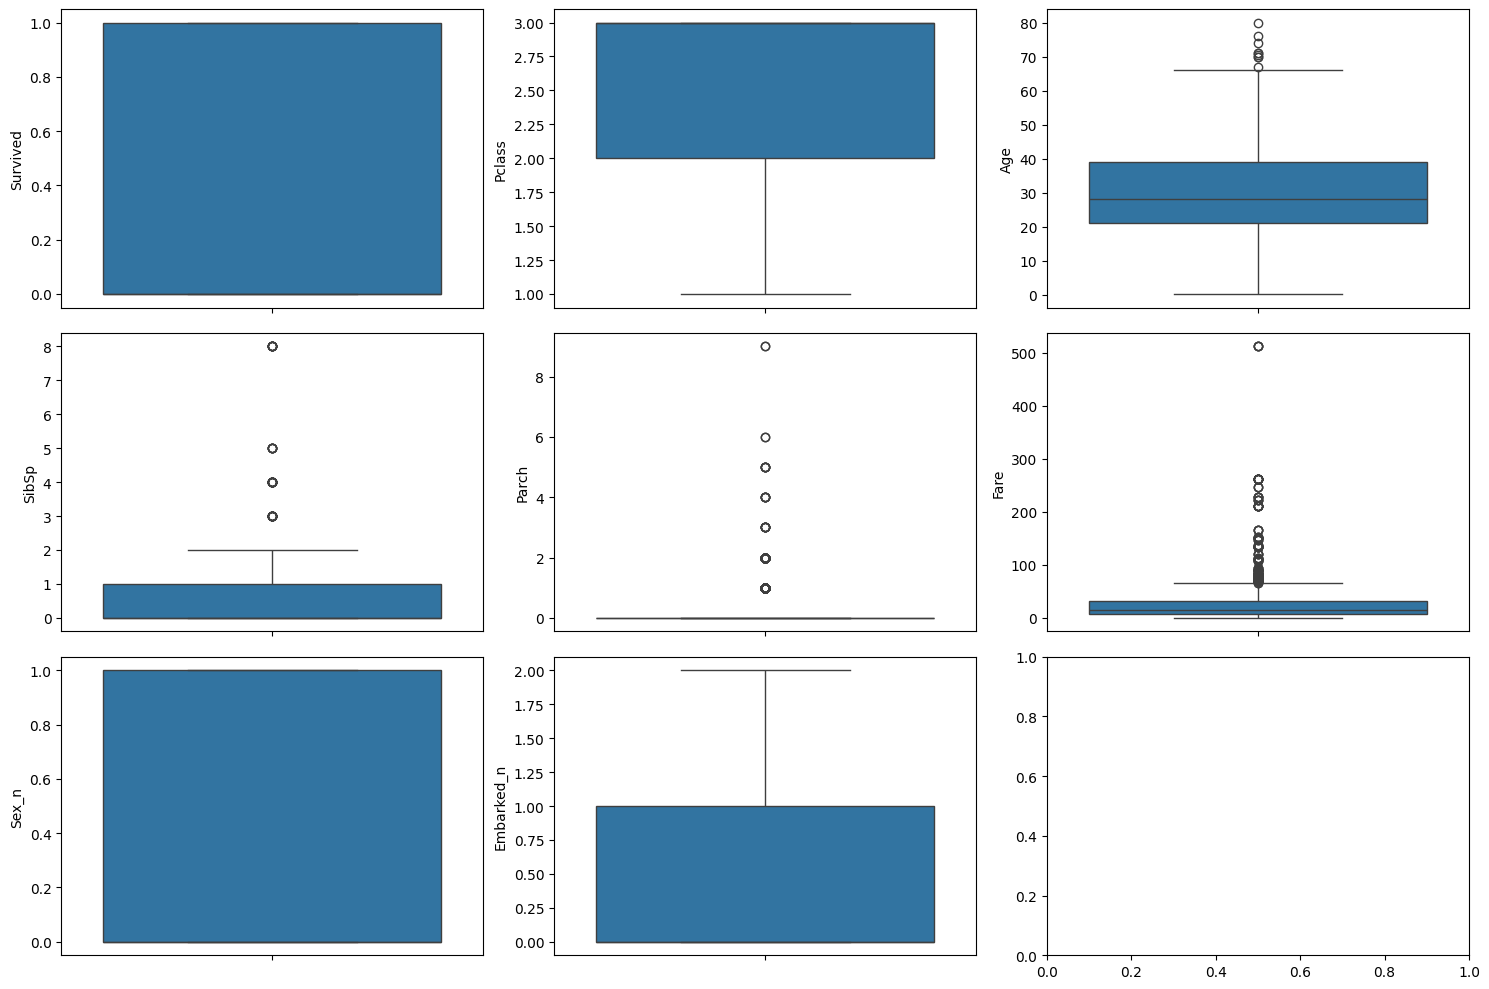

In [21]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

if "Sex_n" not in total_data.columns:
    total_data["Sex_n"] = total_data["Sex"].map({"male": 0, "female": 1})
if "Embarked_n" not in total_data.columns:
    total_data["Embarked_n"] = total_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})
if "FamMembers" not in total_data.columns:
    total_data["FamMembers"] = total_data["SibSp"] + total_data["Parch"]

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Survived")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Pclass")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "Age")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "SibSp")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "Parch")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "Fare")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "Sex_n")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "Embarked_n")

plt.tight_layout()

plt.show()

Podemos determinar fácilmente que las variables afectadas por outliers son `Age`, `SibSp`, `Parch` y `Fare`. En el caso anterior sobre el billete del crucero (columna `Fare`) parece que la tarifa del billete de 512 dólares no es muy común. Deberíamos establecer algunos límites superior e inferior para determinar si un punto de datos debe considerarse o no un valor atípico.

Para lidiar con ellos hay muchas técnicas, y puedes encontrar más información [aquí](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/how-to-deal-with-outliers.es.md), pero que se resume en los siguientes puntos:

- Mantenerlos. En ciertos problemas de Machine Learning, un valor atípico puede decantar la predicción hacia una clase u otra (esto es muy común, por ejemplo, para detectar riesgos). Por lo tanto, podría ser una política que en ciertos casos tuviera sentido. Normalmente no se utiliza.
- Eliminarlos. Aquellas instancias que cuenten con características atípicas se eliminan del conjunto de datos. Sin embargo, si hay muchos valores atípicos, esta estrategia puede causar que se pierda gran parte de la información disponible.
- Reemplazarlos. Si no queremos eliminar instancias completas por la presencia de outliers en una de sus características, podemos reemplazarlos tomándolos en cuenta como valores faltantes y reutilizando la política.

Por ejemplo, si queremos aplicar el segundo punto de los anteriores para el caso de la columna `Fare`:

In [22]:
fare_stats = total_data["Fare"].describe()
fare_stats

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [23]:
fare_iqr = fare_stats["75%"] - fare_stats["25%"]
upper_limit = fare_stats["75%"] + 1.5 * fare_iqr
lower_limit = fare_stats["25%"] - 1.5 * fare_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 66.34 y -27.17, con un rango intercuartílico de 23.38


Basándonos en estos resultados, deberíamos eliminar los registros de los pasajeros cuyo importe de billete supere los 65 dólares. Sin embargo, nuestro criterio es muy importante aquí y, según los precios que vimos en el diagrama de caja, los valores más extremos están por encima de 300. Veamos cuántos valores representan ese valor extremo de 512:

In [24]:
total_data[total_data["Fare"] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n,FamMembers
258,1,1,female,35.0,0,0,512.3292,C,1,1.0,0
679,1,1,male,36.0,0,1,512.3292,C,0,1.0,1
737,1,1,male,35.0,0,0,512.3292,C,0,1.0,0
1234,1,1,female,58.0,0,1,512.3292,C,1,1.0,1


En este caso vemos que todos ellos sobrevivieron, quizá sí que hay un impacto real sobre el precio de billete tan elevado y la supervivencia final. Por lo tanto, sumado al análisis univariante anterior, existe una implicación entre el precio del billete y el resultado final de supervivencia, por lo que decidimos que **mantenemos los valores atípicos**.

#### Análisis de valores faltantes

Un **valor faltante** (*missing value*) es un espacio que no tiene valor asignado en la observación de una variable específica. Este tipo de valores son bastante comunes y pueden surgir por muchas razones. Por ejemplo, podría haber un error en la recopilación de datos, alguien podría haberse negado a responder una pregunta en una encuesta, o simplemente podría ser que cierta información no esté disponible o no sea aplicable.

La función `isnull()` es una poderosa herramienta para obtener esta información:

In [25]:
total_data.isnull().sum().sort_values(ascending=False)

Age           263
Embarked        2
Embarked_n      2
Fare            1
Sex             0
Survived        0
Pclass          0
Parch           0
SibSp           0
Sex_n           0
FamMembers      0
dtype: int64

Además, podemos dividir ese resultado por la longitud de nuestro DataFrame (número de filas) para obtener el porcentaje de valores faltantes en cada columna. Los valores faltantes generalmente se representan en forma de `Nan`, `Null` (nulo) o `None` (ninguno) en el conjunto de datos:

In [26]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

Age           0.200917
Embarked      0.001528
Embarked_n    0.001528
Fare          0.000764
Sex           0.000000
Survived      0.000000
Pclass        0.000000
Parch         0.000000
SibSp         0.000000
Sex_n         0.000000
FamMembers    0.000000
dtype: float64

Para lidiar con ellos hay muchas técnicas, y puedes encontrar más información [aquí](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/how-to-deal-with-missing-values.es.ipynb), pero que se resume en los siguientes puntos:

- Eliminarlos. Similar al caso anterior de los outliers.
- Imputación numérica: Para rellenar los valores faltantes en una variable numérica, normalmente el procedimiento es utilizar los valores estadísticos de la muestra. Lo más común es importarlo usando la media, moda o mediana de esa característica.
- Imputación categórica: Cuando la columna es categórica, normalmente se suelen rellenar cogiendo el elemento de la mayor o mejor categoría.

Para los casos con datos faltantes observados en las variables `Age`, `Embarked` y `Fare`, vamos a utilizar la imputación numérica a través de la función `fillna()`. En este caso vamos a utilizar algunas de las distintas opciones que se pueden escoger para rellenar valores:

In [27]:
total_data["Age"] = total_data["Age"].fillna(total_data["Age"].median())
total_data["Embarked"] = total_data["Embarked"].fillna(total_data["Embarked"].mode()[0])
total_data["Fare"] = total_data["Fare"].fillna(total_data["Fare"].mean())

total_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Sex_n         0
Embarked_n    2
FamMembers    0
dtype: int64

Vemos cómo los valores han sido imputados correctamente y ya no existen faltantes.

#### Inferencia de nuevas características

Otro uso típico en esta ingeniería es la de la obtención de nuevas características mediante la "fusión" de dos o más ya existentes. Por ejemplo, en este caso de uso, el del análisis del Titanic, hay dos variables que representan los acompañantes de un pasajero. Por un lado, `SibSp` contabiliza el número de hermanos que acompañaban al pasajero (incluyendo a su cónyuge, si aplica) y, por otro, `Parch` contabiliza el número de acompañantes que eran padres e hijos. Uniendo estas dos variables y sumándolas podemos obtener una tercera, que nos informa sobre los acompañantes de un pasajero determinado, sin distinción entre los vínculos que pudieran tener.

In [28]:
total_data["FamMembers"] = total_data["SibSp"] + total_data["Parch"]

total_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n,FamMembers
0,0,3,male,22.0,1,0,7.2500,S,0,0.0,1
1,1,1,female,38.0,1,0,71.2833,C,1,1.0,1
2,1,3,female,26.0,0,0,7.9250,S,1,0.0,0
3,1,1,female,35.0,1,0,53.1000,S,1,0.0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0.0,0


De esta forma podemos simplificar el número de variables y trazar nuevas relaciones con la clase predictora.

#### Escalado de valores

El **escalado de valores** (*feature scaling*) es un paso crucial en el preprocesamiento de datos para muchos algoritmos de Machine Learning. Es una técnica que cambia el rango de los valores de los datos para que puedan ser comparables entre sí. El escalado normalmente implica la normalización, que es el proceso de cambiar los valores para que tengan una media de 0 y una desviación estándar de 1. Otra técnica común es el escalado mínimo-máximo, que transforma los datos para que todos los valores estén entre 0 y 1.

Antes de escalar los valores, debemos asegurarnos de que todas nuestras variables predictoras sean numéricas. Una vez preparadas, podemos aplicar técnicas como la normalización o el escalado Min-Max directamente sobre el dataset completo. Más adelante, cuando pasemos a la fase de modelado, será el momento de dividir los datos en entrenamiento y prueba.

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_variables = ["Pclass", "Age", "Fare", "SibSp", "Parch", "Sex_n", "Embarked_n", "FamMembers"]
X = total_data[num_variables]

# Normalización
scaler_norm = StandardScaler()
X_norm = pd.DataFrame(scaler_norm.fit_transform(X), index=total_data.index, columns=num_variables)

# Min-Max
scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), index=total_data.index, columns=num_variables)

X_norm.head(), X_minmax.head()

(     Pclass       Age      Fare     SibSp  Parch     Sex_n  Embarked_n  \
 0  0.841916 -0.581628 -0.503595  0.481288 -0.445 -0.743497   -0.604066   
 1 -1.546098  0.658652  0.734503  0.481288 -0.445  1.344995    0.926000   
 2  0.841916 -0.271558 -0.490544 -0.479087 -0.445  1.344995   -0.604066   
 3 -1.546098  0.426099  0.382925  0.481288 -0.445  1.344995   -0.604066   
 4  0.841916  0.426099 -0.488127 -0.479087 -0.445 -0.743497   -0.604066   
 
    FamMembers  
 0    0.073352  
 1    0.073352  
 2   -0.558346  
 3    0.073352  
 4   -0.558346  ,
    Pclass       Age      Fare  SibSp  Parch  Sex_n  Embarked_n  FamMembers
 0     1.0  0.273456  0.014151  0.125    0.0    0.0         0.0         0.1
 1     0.0  0.473882  0.139136  0.125    0.0    1.0         0.5         0.1
 2     1.0  0.323563  0.015469  0.000    0.0    1.0         0.0         0.0
 3     0.0  0.436302  0.103644  0.125    0.0    1.0         0.0         0.1
 4     1.0  0.436302  0.015713  0.000    0.0    0.0         0.0  

> NOTA: Sólo se deben escalar las variables predictoras, nunca la objetivo.

A continuación detallaremos cómo podemos aplicar cada una de ellas, pero recordemos que depende mucho del modelo que vayamos a querer entrenar:

##### Normalización

In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_variables = ["Pclass", "Age", "Fare", "SibSp", "Parch", "Sex_n", "Embarked_n", "FamMembers"]
X = total_data[num_variables]

# Normalización (media 0, desviación estándar 1)
scaler_norm = StandardScaler()
X_norm = pd.DataFrame(scaler_norm.fit_transform(X), index=total_data.index, columns=num_variables)

# Escalado Min-Max (valores entre 0 y 1)
scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), index=total_data.index, columns=num_variables)

X_norm.head(), X_minmax.head()

(     Pclass       Age      Fare     SibSp  Parch     Sex_n  Embarked_n  \
 0  0.841916 -0.581628 -0.503595  0.481288 -0.445 -0.743497   -0.604066   
 1 -1.546098  0.658652  0.734503  0.481288 -0.445  1.344995    0.926000   
 2  0.841916 -0.271558 -0.490544 -0.479087 -0.445  1.344995   -0.604066   
 3 -1.546098  0.426099  0.382925  0.481288 -0.445  1.344995   -0.604066   
 4  0.841916  0.426099 -0.488127 -0.479087 -0.445 -0.743497   -0.604066   
 
    FamMembers  
 0    0.073352  
 1    0.073352  
 2   -0.558346  
 3    0.073352  
 4   -0.558346  ,
    Pclass       Age      Fare  SibSp  Parch  Sex_n  Embarked_n  FamMembers
 0     1.0  0.273456  0.014151  0.125    0.0    0.0         0.0         0.1
 1     0.0  0.473882  0.139136  0.125    0.0    1.0         0.5         0.1
 2     1.0  0.323563  0.015469  0.000    0.0    1.0         0.0         0.0
 3     0.0  0.436302  0.103644  0.125    0.0    1.0         0.0         0.1
 4     1.0  0.436302  0.015713  0.000    0.0    0.0         0.0  

##### Escalado Mínimo-Máximo

In [79]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["Pclass", "Age", "Fare", "SibSp", "Parch", "Sex_n", "Embarked_n", "FamMembers"]
X = total_data[num_variables]

scaler = MinMaxScaler()
X_minmax = pd.DataFrame(scaler.fit_transform(X), index=total_data.index, columns=num_variables)

X_minmax.head()


,Pclass,Age,Fare,SibSp,Parch,Sex_n,Embarked_n,FamMembers
0,1.0,0.273456,0.014151,0.125,0.0,0.0,0.0,0.1
1,0.0,0.473882,0.139136,0.125,0.0,1.0,0.5,0.1
2,1.0,0.323563,0.015469,0.000,0.0,1.0,0.0,0.0
3,0.0,0.436302,0.103644,0.125,0.0,1.0,0.0,0.1
4,1.0,0.436302,0.015713,0.000,0.0,0.0,0.0,0.0


> NOTA: En este paso debemos asegurar que todas nuestras variables son numéricas, y, si no, como hemos visto en los pasos del principio, deberíamos transformarlas, como hemos hecho con `Sex` y `Embarked`.

## FIN DEL DÍA 2

¡Ahora, trabajemos y practiquemos la lección de hoy para afianzar lo aprendido!

## DÍA 3

### Paso 6: Selección de características

La **selección de características** (*feature selection*) es un proceso que implica seleccionar las características (variables) más relevantes de nuestro conjunto de datos para usarlas en la construcción de un modelo de Machine Learning, desechando el resto.

Existen varias razones para incluirlo en nuestro análisis exploratorio:

1. Simplificar el modelo para que sea más fácil de entender e interpretar.
2. Reducir el tiempo de entrenamiento del modelo.
3. Evitar el sobre ajuste al reducir la dimensionalidad del modelo y minimizar el ruido y las correlaciones innecesarias.
4. Mejorar el rendimiento del modelo al eliminar las características irrelevantes.

Además, existen diversas técnicas para la selección de características. Muchas de ellas se basan a su vez en modelos supervisados, entrenados o de clustering, tienes más información [aquí](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/feature-selection.es.md).

La librería `sklearn` contiene gran parte de las mejores alternativas para llevarla a cabo. Una de las herramientas que más se utilizan para realizar procesos de selección de características rápidos y con buenos resultados es `SelectKBest`. Esta función selecciona las `k` mejores características de nuestro conjunto de datos basándose en una función de un test estadístico. Este test estadístico normalmente es un ANOVA o un Chi-Cuadrado:

In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif


if "Sex_n" not in total_data.columns:
    total_data["Sex_n"] = total_data["Sex"].map({"male": 0, "female": 1})
if "Embarked_n" not in total_data.columns:
    total_data["Embarked_n"] = total_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})
if "FamMembers" not in total_data.columns:
    total_data["FamMembers"] = total_data["SibSp"] + total_data["Parch"]

num_variables = ["Pclass", "Age", "Fare", "SibSp", "Parch", "Sex_n", "Embarked_n", "FamMembers"]
X = total_data[num_variables].apply(pd.to_numeric, errors="coerce")
y = total_data["Survived"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("selector", SelectKBest(score_func=f_classif, k=5))
])


X_train_sel = pipe.fit_transform(X_train, y_train)
mask = pipe.named_steps["selector"].get_support()
selected_cols = np.array(num_variables)[mask]


X_test_sel = pipe.transform(X_test)


X_train_sel = pd.DataFrame(X_train_sel, index=X_train.index, columns=selected_cols)
X_test_sel  = pd.DataFrame(X_test_sel,  index=X_test.index,  columns=selected_cols)

print("Features seleccionadas:", list(selected_cols))
X_train_sel.head()

Features seleccionadas: [np.str_('Pclass'), np.str_('Fare'), np.str_('Parch'), np.str_('Sex_n'), np.str_('Embarked_n')]


,Pclass,Fare,Parch,Sex_n,Embarked_n
1021,3.0,8.0500,0.0,0.0,0.0
318,1.0,164.8667,2.0,1.0,0.0
924,3.0,23.4500,2.0,1.0,0.0
652,3.0,8.4333,0.0,0.0,0.0
1189,1.0,45.5000,0.0,0.0,0.0


In [96]:
X_test_sel.head()

,Pclass,Fare,Parch,Sex_n,Embarked_n,Survived
950,1.0,262.3750,0.0,1.0,1.0,1
811,3.0,24.1500,0.0,0.0,0.0,0
475,1.0,52.0000,0.0,0.0,0.0,0
1136,1.0,51.8625,0.0,0.0,0.0,0
137,1.0,53.1000,0.0,0.0,0.0,0


In [95]:
X_train_sel["Survived"] = list(y_train)
X_test_sel["Survived"] = list(y_test)

In [92]:
X_train_sel.to_csv("/workspaces/machine-learning-content/assets/clean_titanic_train.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-content/assets/clean_titanic_test.csv", index=False)

La selección de características, al igual que el entrenamiento del modelo en general, se debe realizar solo en el conjunto de datos de entrenamiento y no en la totalidad. Si la llevásemos a cabo en todo el conjunto, podríamos introducir un sesgo que se conoce como **contaminación de datos** (*data leakage*), que ocurre cuando la información del conjunto de prueba se utiliza para tomar decisiones durante el entrenamiento, lo que puede llevar a una estimación demasiado optimista del rendimiento del modelo.

Por eso, la mejor práctica es dividir los datos en dos conjuntos: de entrenamiento y de prueba antes de la selección de características, que se realizará solo con los datos de entrenamiento y que luego se aplicará a ambos. De esta manera, aseguramos que este proceso y el modelo están siendo validados de manera justa.

En este caso, utilizando la selección de características de Chi cuadrado, las características más importantes son `Pclass`, `Sex`, `Parch`, `Fare` y `Embarked`.

## FIN DEL DÍA 3

Ahora ya conocemos cómo llevar a cabo un estudio profundo y en detalle para conocer completamente nuestro conjunto de datos. Recordemos los pasos que tenemos que seguir para llevarlo a cabo:

- Paso 1: Planteamiento del problema y recopilación de datos
- Paso 2: Exploración y limpieza de datos
- Paso 3: Análisis de variables univariante
- Paso 4: Análisis de variables multivariante
- Paso 5: Ingeniería de características
- Paso 6: Selección de características

Tras la implementación y adopción de estos pasos, estaremos preparados para entrenar el modelo.